In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1.Data load

In [101]:
df = pd.read_csv('../data/TR222100060001_20230901.csv')
df.head()

,sigungu_cd,emdl_cd,cll,mno,sno,adres,hus_tp,comp_nm,bldg_year,flr,xuar,ctrt_yrmth,ctrt_day,transct_type,dlng_amount,grnte_amount,mthrnt_amount,near_subw_nm,near_subw_dist
0,11110,10700,1,156,0,서울특별시 종로구 적선동 156,오피스텔,광화문 플래티넘,2003.0,4,43.47,202307,14,매매,31000,0,0,경복궁(정부서울청사)역,102.3
1,11110,11500,1,9,0,서울특별시 종로구 사직동 9,아파트,광화문스페이스본(101동~105동),2008.0,10,146.92,202307,19,전세,0,110000,0,경복궁(정부서울청사)역,236.2
2,11110,11500,1,9,0,서울특별시 종로구 사직동 9,오피스텔,광화문 풍림스페이스본,2008.0,4,39.54,202307,11,월세,0,1000,110,경복궁(정부서울청사)역,236.2
3,11110,11500,1,9,0,서울특별시 종로구 사직동 9,아파트,광화문스페이스본(101동~105동),2008.0,3,97.61,202307,4,전세,0,90000,0,경복궁(정부서울청사)역,236.2
4,11110,11500,1,9,0,서울특별시 종로구 사직동 9,아파트,광화문스페이스본(101동~105동),2008.0,5,70.80,202307,15,월세,0,10000,215,경복궁(정부서울청사)역,236.2


In [102]:
# 불필요한 column 제거
df_interest = df.drop(['mno', 'sno', 'adres', 'comp_nm', 'ctrt_yrmth', 'ctrt_day', 'emdl_cd', 'cll'], axis=1)

In [103]:
df.info() # data 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32455 entries, 0 to 32454
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sigungu_cd      32455 non-null  int64  
 1   emdl_cd         32455 non-null  int64  
 2   cll             32455 non-null  int64  
 3   mno             32455 non-null  int64  
 4   sno             32455 non-null  int64  
 5   adres           32455 non-null  object 
 6   hus_tp          32455 non-null  object 
 7   comp_nm         32455 non-null  object 
 8   bldg_year       32228 non-null  float64
 9   flr             32455 non-null  int64  
 10  xuar            32455 non-null  float64
 11  ctrt_yrmth      32455 non-null  int64  
 12  ctrt_day        32455 non-null  int64  
 13  transct_type    32455 non-null  object 
 14  dlng_amount     32455 non-null  int64  
 15  grnte_amount    32455 non-null  int64  
 16  mthrnt_amount   32455 non-null  int64  
 17  near_subw_nm    32455 non-null 

In [104]:
# 영문으로 변경
df_interest.loc[df_interest['hus_tp'] == '오피스텔', 'hus_tp'] = 'office'
df_interest.loc[df_interest['hus_tp'] == '아파트', 'hus_tp'] = 'apartment'
df_interest.loc[df_interest['hus_tp'] == '연립다세대', 'hus_tp'] = 'row house'
df_interest.head()

,sigungu_cd,hus_tp,bldg_year,flr,xuar,transct_type,dlng_amount,grnte_amount,mthrnt_amount,near_subw_nm,near_subw_dist
0,11110,office,2003.0,4,43.47,매매,31000,0,0,경복궁(정부서울청사)역,102.3
1,11110,apartment,2008.0,10,146.92,전세,0,110000,0,경복궁(정부서울청사)역,236.2
2,11110,office,2008.0,4,39.54,월세,0,1000,110,경복궁(정부서울청사)역,236.2
3,11110,apartment,2008.0,3,97.61,전세,0,90000,0,경복궁(정부서울청사)역,236.2
4,11110,apartment,2008.0,5,70.80,월세,0,10000,215,경복궁(정부서울청사)역,236.2


In [105]:
df_interest_dongdaemoon = df_interest[df_interest['sigungu_cd'] == 11230] # 동대문구만 추출
df_interest_dongdaemoon

,sigungu_cd,hus_tp,bldg_year,flr,xuar,transct_type,dlng_amount,grnte_amount,mthrnt_amount,near_subw_nm,near_subw_dist
2378,11230,row house,2023.0,3,38.86,월세,0,5000,170,신설동역,198.3
2379,11230,row house,2019.0,6,28.12,전세,0,27000,0,신설동역,171.5
2380,11230,row house,2019.0,4,27.18,전세,0,26000,0,신설동역,171.5
2381,11230,row house,2019.0,4,28.44,전세,0,26000,0,신설동역,171.5
2382,11230,office,2003.0,10,22.44,전세,0,8390,0,신설동역,79.7
...,...,...,...,...,...,...,...,...,...,...,...
3000,11230,row house,2013.0,3,19.21,월세,0,2000,40,"회기역(1호선,중앙선)",402.6
3001,11230,office,2023.0,11,22.02,매매,24200,0,0,"회기역(1호선,중앙선)",315.7
3002,11230,row house,1984.0,3,115.16,매매,61500,0,0,외대앞역(1호선),493.3
3003,11230,apartment,2008.0,3,84.84,월세,0,15000,120,신이문역(1호선),343.5


In [106]:
df_interest_dongdaemoon.isnull().sum() # 결측치 확인

sigungu_cd        0
hus_tp            0
bldg_year         6
flr               0
xuar              0
transct_type      0
dlng_amount       0
grnte_amount      0
mthrnt_amount     0
near_subw_nm      0
near_subw_dist    0
dtype: int64

In [107]:
df_interest_dongdaemoon.dropna(inplace=True) # 결측치 제거
df_interest_dongdaemoon.isnull().sum() # 결측치 확인

/var/folders/_s/v4zjctwd7ld7gw58k3y9ngsr0000gn/T/ipykernel_13899/1386561818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest_dongdaemoon.dropna(inplace=True) # 결측치 제거


sigungu_cd        0
hus_tp            0
bldg_year         0
flr               0
xuar              0
transct_type      0
dlng_amount       0
grnte_amount      0
mthrnt_amount     0
near_subw_nm      0
near_subw_dist    0
dtype: int64

# 2. EDA

In [108]:
df_interest_dongdaemoon.describe() # 동대문구만 추출한 데이터의 기초통계량 확인

,sigungu_cd,bldg_year,flr,xuar,dlng_amount,grnte_amount,mthrnt_amount,near_subw_dist
count,621.0,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000
mean,11230.0,2012.724638,9.718196,48.739533,9866.752013,19915.752013,24.966184,226.111755
std,0.0,10.070551,7.455209,29.501079,26812.290352,20086.859301,45.470236,132.879157
min,11230.0,1971.000000,-1.000000,11.960000,0.000000,0.000000,0.000000,0.000000
25%,11230.0,2007.000000,4.000000,21.410000,0.000000,1000.000000,0.000000,113.300000
50%,11230.0,2015.000000,8.000000,41.860000,0.000000,13500.000000,0.000000,231.000000
75%,11230.0,2020.000000,13.000000,70.010000,0.000000,32000.000000,40.000000,349.800000
max,11230.0,2023.000000,49.000000,152.170000,150000.000000,73000.000000,240.000000,499.200000


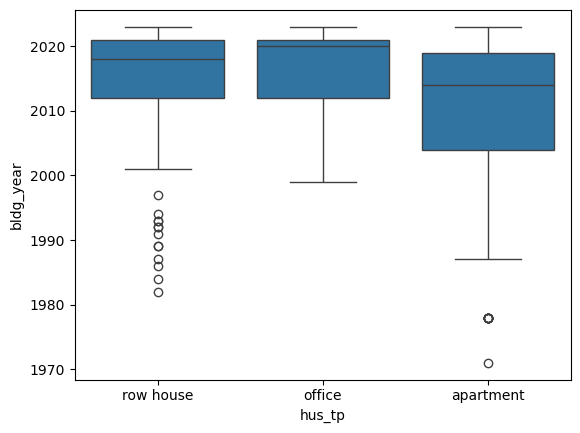

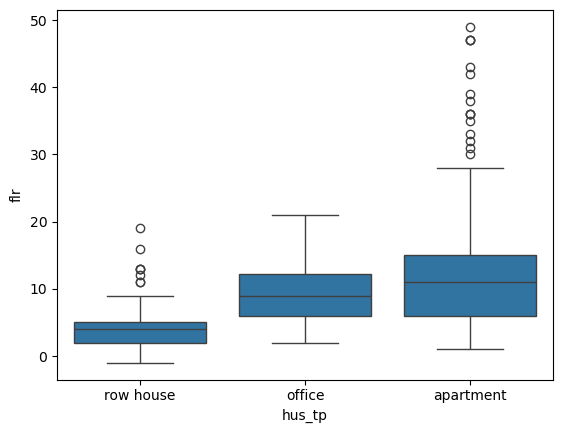

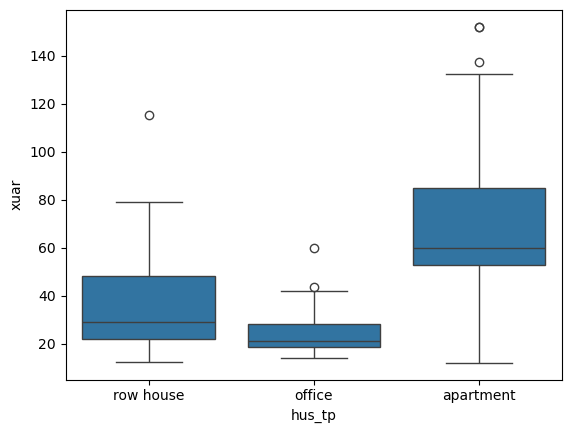

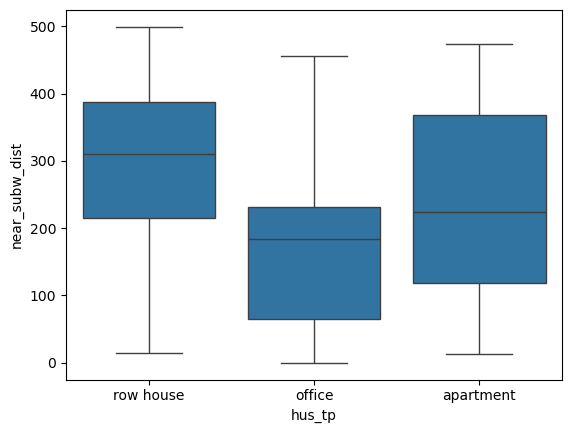

In [109]:
columns_to_plot = ['bldg_year', 'flr', 'xuar', 'near_subw_dist']
for column in columns_to_plot:
    sns.boxplot(x='hus_tp', y=column, data=df_interest_dongdaemoon)
    plt.show()

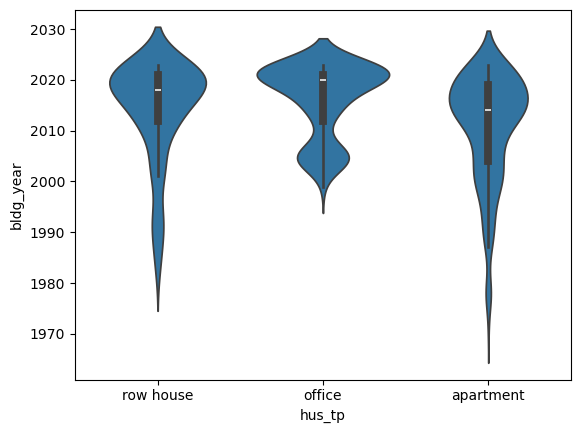

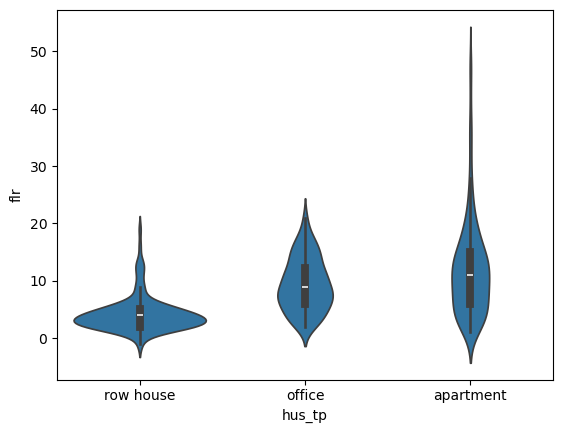

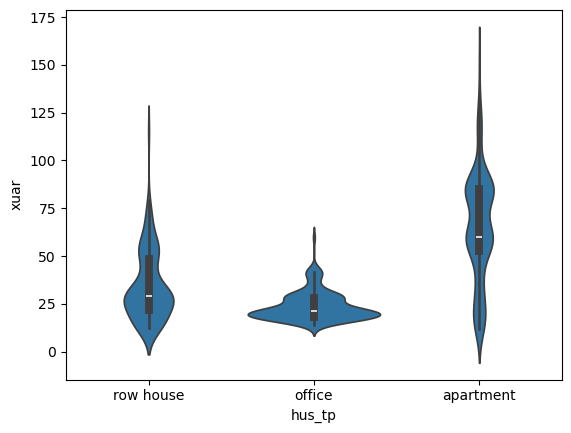

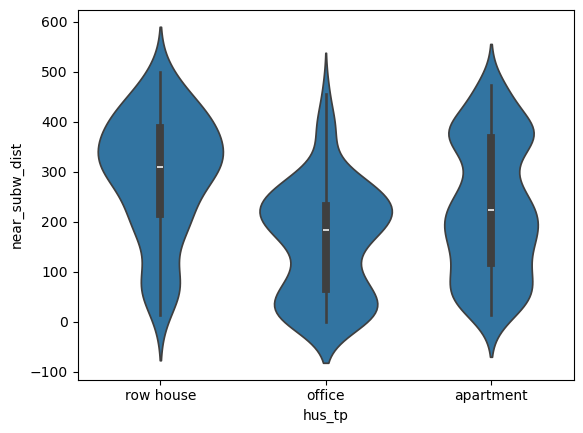

In [110]:
for column in columns_to_plot:
    sns.violinplot(x='hus_tp', y=column, data=df_interest_dongdaemoon)
    plt.show()

<Axes: >

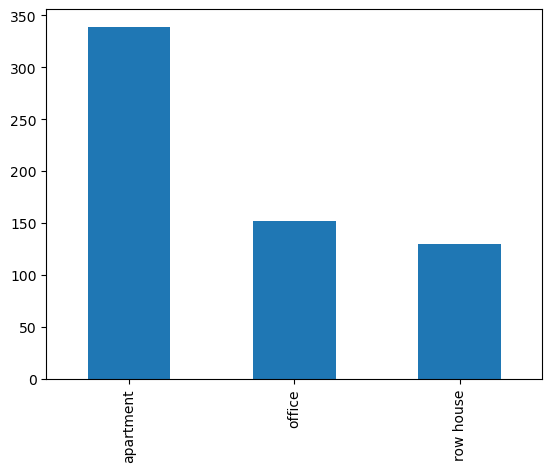

In [111]:
df_interest_dongdaemoon['hus_tp'].value_counts().plot(kind='bar')

In [112]:
df_interest_dongdaemoon.loc[df_interest_dongdaemoon['transct_type']=='매매', 'transct_type'] = 'trade'
df_interest_dongdaemoon.loc[df_interest_dongdaemoon['transct_type']=='월세', 'transct_type'] = 'rent'
df_interest_dongdaemoon.loc[df_interest_dongdaemoon['transct_type']=='전세', 'transct_type'] = 'lease'

<Axes: >

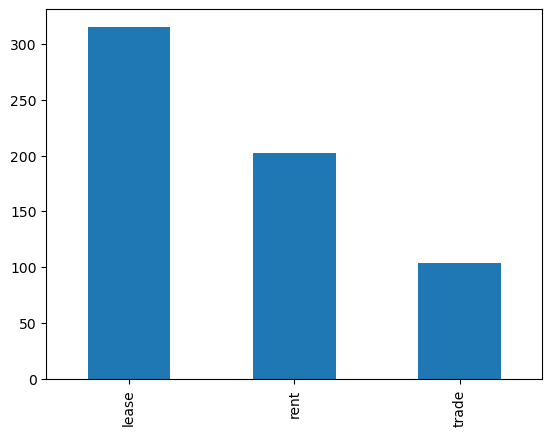

In [113]:
df_interest_dongdaemoon['transct_type'].value_counts().plot.bar()

In [114]:
trade = df_interest_dongdaemoon[df_interest_dongdaemoon['transct_type']=='trade']
lease = df_interest_dongdaemoon[df_interest_dongdaemoon['transct_type']=='lease']
rent = df_interest_dongdaemoon[df_interest_dongdaemoon['transct_type']=='rent']

In [115]:
trade.describe()

,sigungu_cd,bldg_year,flr,xuar,dlng_amount,grnte_amount,mthrnt_amount,near_subw_dist
count,104.0,104.000000,104.000000,104.000000,104.000000,104.0,104.0,104.000000
mean,11230.0,2009.336538,9.105769,55.021346,58915.894231,0.0,0.0,251.634615
std,0.0,11.451553,5.644687,29.640865,37543.608667,0.0,0.0,141.577698
min,11230.0,1971.000000,1.000000,13.860000,5750.000000,0.0,0.0,27.500000
25%,11230.0,2002.750000,4.000000,25.200000,24800.000000,0.0,0.0,132.400000
50%,11230.0,2014.000000,9.000000,57.185000,52875.000000,0.0,0.0,242.050000
75%,11230.0,2018.000000,13.000000,80.865000,83500.000000,0.0,0.0,367.050000
max,11230.0,2023.000000,25.000000,124.760000,150000.000000,0.0,0.0,493.300000


In [116]:
lease.describe()

,sigungu_cd,bldg_year,flr,xuar,dlng_amount,grnte_amount,mthrnt_amount,near_subw_dist
count,315.0,315.000000,315.000000,315.000000,315.0,315.000000,315.0,315.000000
mean,11230.0,2013.114286,9.615873,53.369175,0.0,34213.625397,0.0,233.150476
std,0.0,10.094440,8.188955,30.319581,0.0,17390.099084,0.0,135.459324
min,11230.0,1978.000000,-1.000000,11.960000,0.0,6394.000000,0.0,0.000000
25%,11230.0,2007.500000,4.000000,27.585000,0.0,20000.000000,0.0,121.800000
50%,11230.0,2017.000000,8.000000,55.370000,0.0,30000.000000,0.0,232.900000
75%,11230.0,2020.000000,13.000000,84.795000,0.0,50000.000000,0.0,361.150000
max,11230.0,2023.000000,49.000000,152.170000,0.0,73000.000000,0.0,499.200000


In [117]:
rent.describe()

,sigungu_cd,bldg_year,flr,xuar,dlng_amount,grnte_amount,mthrnt_amount,near_subw_dist
count,202.0,202.000000,202.000000,202.000000,202.0,202.000000,202.000000,202.000000
mean,11230.0,2013.861386,10.193069,38.285842,0.0,7873.217822,76.752475,201.995050
std,0.0,8.886268,7.065250,25.187618,0.0,10039.790562,48.815911,120.533737
min,11230.0,1978.000000,1.000000,12.550000,0.0,100.000000,1.000000,0.000000
25%,11230.0,2010.000000,5.000000,19.282500,0.0,1000.000000,45.000000,95.600000
50%,11230.0,2016.000000,9.000000,28.095000,0.0,3000.000000,65.000000,203.100000
75%,11230.0,2021.000000,14.000000,59.650000,0.0,10000.000000,100.000000,276.450000
max,11230.0,2023.000000,47.000000,137.420000,0.0,51000.000000,240.000000,481.700000


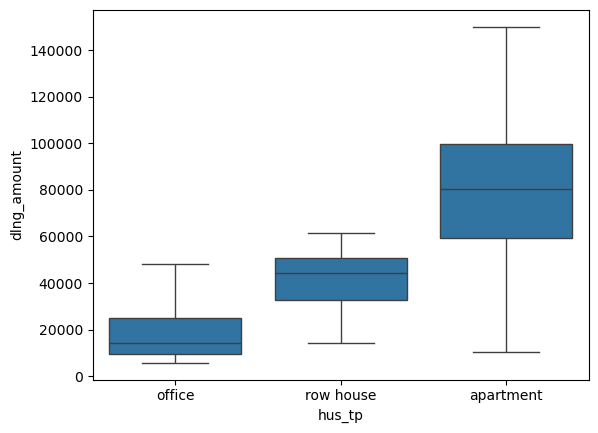

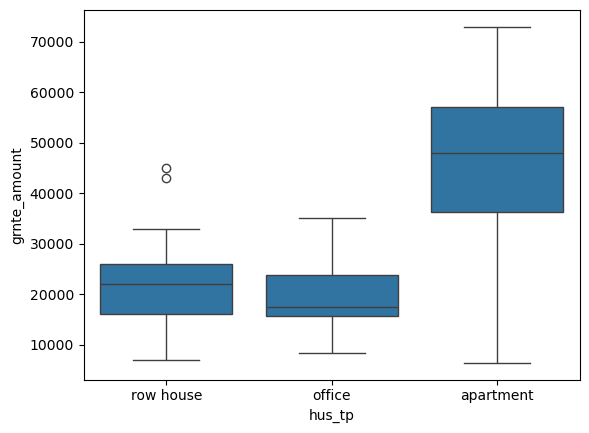

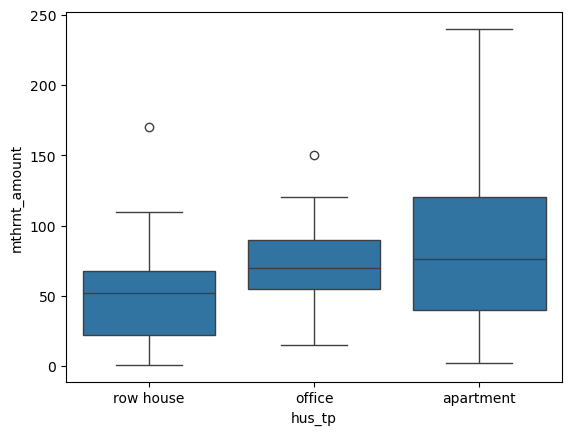

In [118]:
sns.boxplot(x='hus_tp', y='dlng_amount', data=trade)
plt.show()

sns.boxplot(x='hus_tp', y='grnte_amount', data=lease)
plt.show()

sns.boxplot(x='hus_tp', y='mthrnt_amount', data=rent)
plt.show()

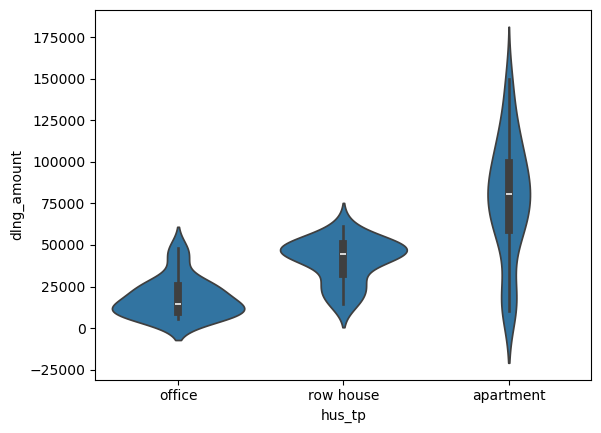

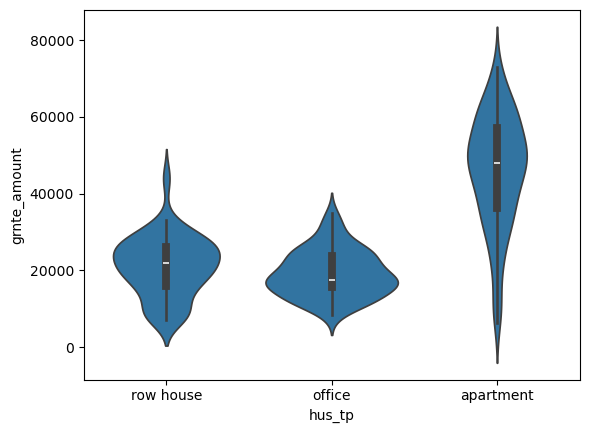

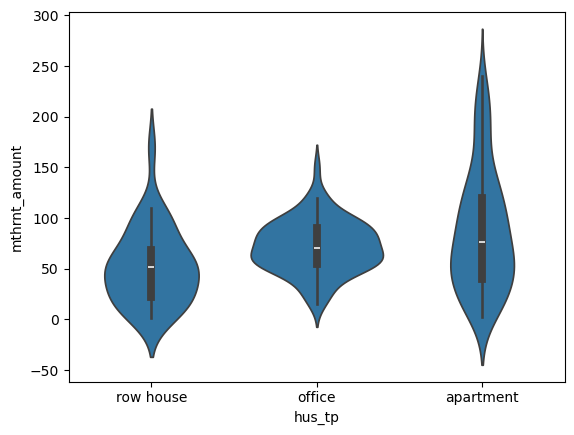

In [119]:
sns.violinplot(x='hus_tp', y='dlng_amount', data=trade)
plt.show()

sns.violinplot(x='hus_tp', y='grnte_amount', data=lease)
plt.show()

sns.violinplot(x='hus_tp', y='mthrnt_amount', data=rent)
plt.show()

- 다세대주택, 오피스텔과 아파트의 분포 차이가 큼.

- 이후로는, 다세대주택, 오피스텔 데이터를 거래 유형으로 나누어 분석

- 이후 분석의 목적: 단위면적 당 거래가와 다른 변수들 간 상관관계 파악

In [120]:
trade_without_apt = trade[trade['hus_tp'] != 'apartment']
rent_without_apt = rent[rent['hus_tp'] != 'apartment']
lease_without_apt = lease[lease['hus_tp'] != 'apartment']

In [121]:
trade_without_apt['dlng_amount_per_m2'] = trade_without_apt['dlng_amount'] / trade_without_apt['xuar']
rent_without_apt['mthrnt_amount_per_m2'] = rent_without_apt['mthrnt_amount'] / rent_without_apt['xuar']
lease_without_apt['grnte_amount_per_m2'] = lease_without_apt['grnte_amount'] / lease_without_apt['xuar']

/var/folders/_s/v4zjctwd7ld7gw58k3y9ngsr0000gn/T/ipykernel_13899/3960755070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_without_apt['dlng_amount_per_m2'] = trade_without_apt['dlng_amount'] / trade_without_apt['xuar']
/var/folders/_s/v4zjctwd7ld7gw58k3y9ngsr0000gn/T/ipykernel_13899/3960755070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_without_apt['mthrnt_amount_per_m2'] = rent_without_apt['mthrnt_amount'] / rent_without_apt['xuar']
/var/folders/_s/v4zjctwd7ld7gw58k3y9ngsr0000gn/T/

거래 유형: 매매

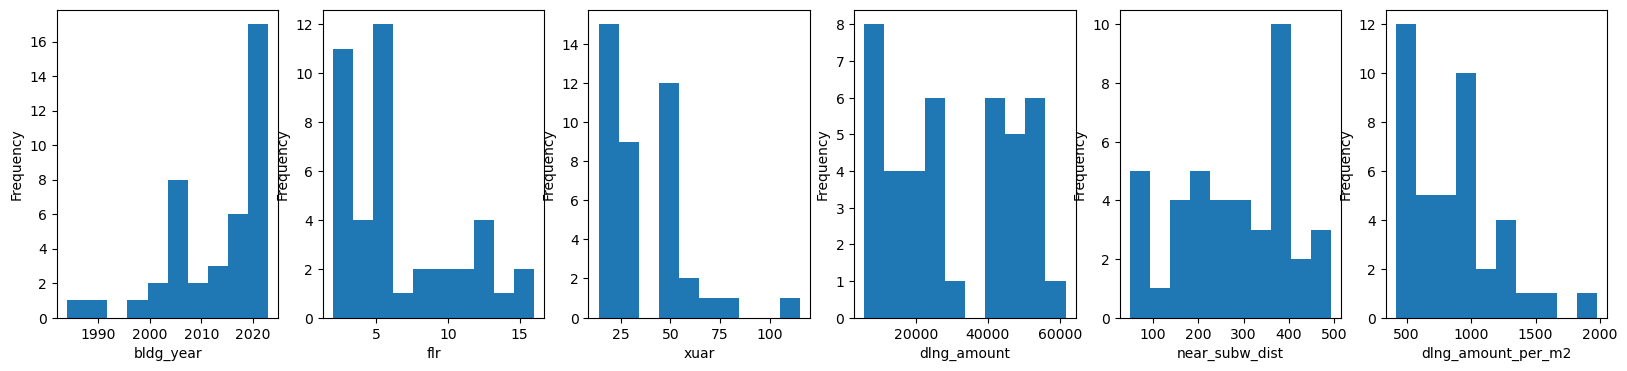

In [122]:
selected_col = ['bldg_year', 'flr', 'xuar', 'dlng_amount', 'near_subw_dist', 'dlng_amount_per_m2']
fig, axes = plt.subplots(nrows=1, ncols=len(selected_col), figsize=(20, 4))

for i in range(len(selected_col)):
    axes[i].set_xlabel(selected_col[i])
    trade_without_apt[selected_col[i]].plot.hist(ax=axes[i])

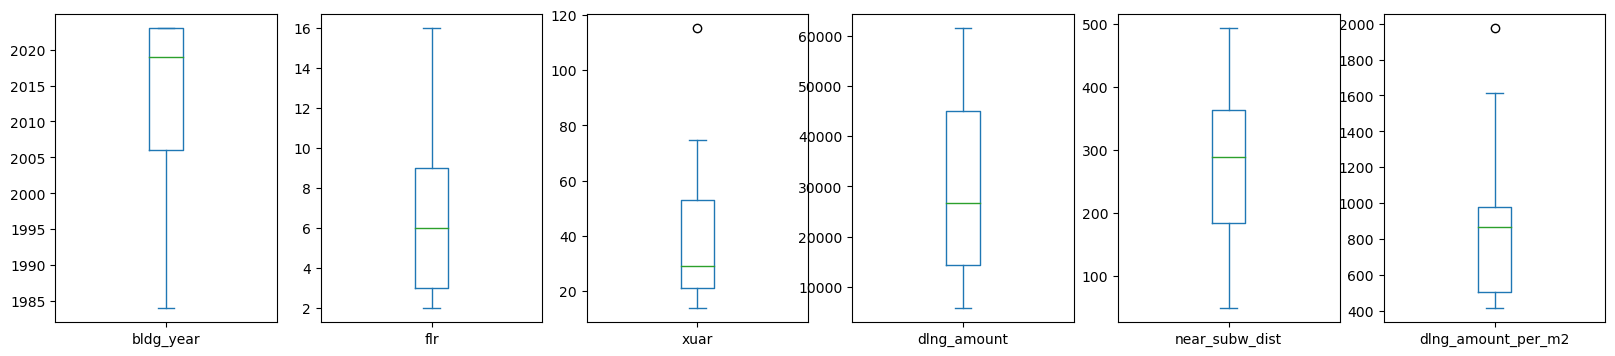

In [123]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 4))

for i in range(6):
    trade_without_apt[selected_col[i]].plot.box(ax=axes[i])

거래 유형: 전세

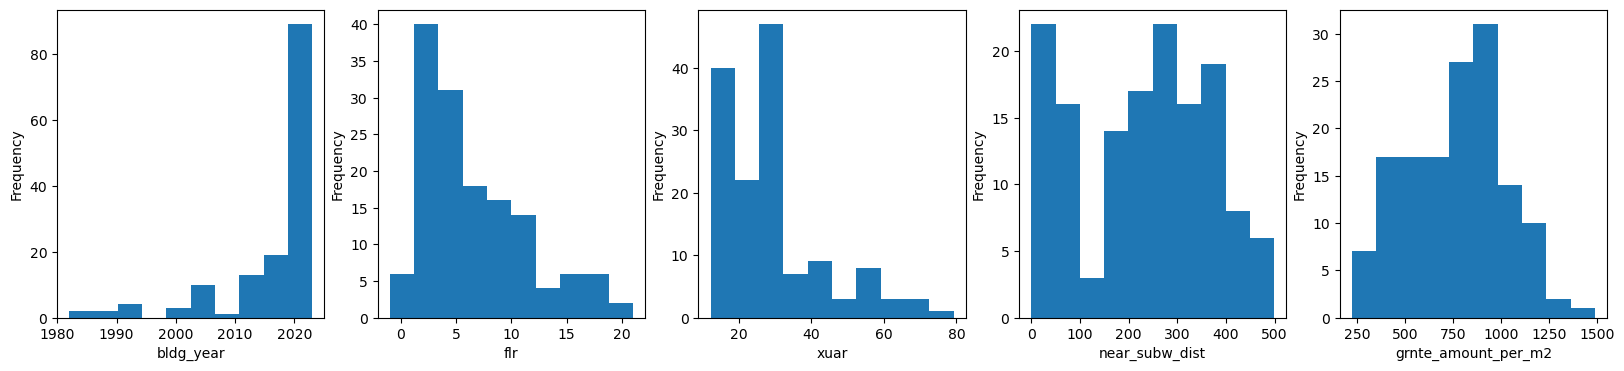

In [124]:
selected_col = ['bldg_year', 'flr', 'xuar', 'near_subw_dist', 'grnte_amount_per_m2']
fig, axes = plt.subplots(nrows=1, ncols=len(selected_col), figsize=(20, 4))

for i in range(len(selected_col)):
    axes[i].set_xlabel(selected_col[i])
    lease_without_apt[selected_col[i]].plot.hist(ax=axes[i])

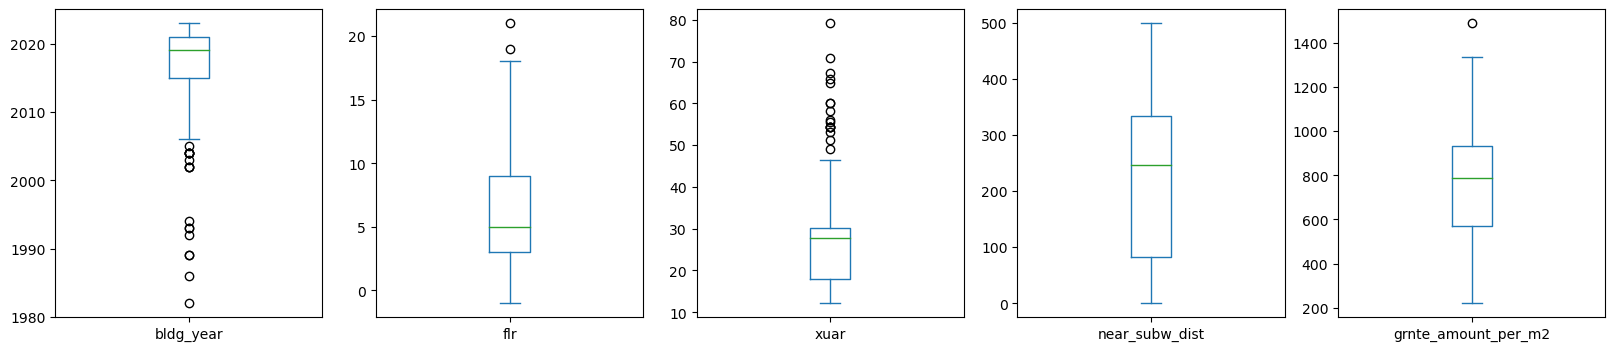

In [125]:
fig, axes = plt.subplots(nrows=1, ncols=len(selected_col), figsize=(20, 4))

for i in range(len(selected_col)):
    
    lease_without_apt[selected_col[i]].plot.box(ax=axes[i])

거래 유형: 월세

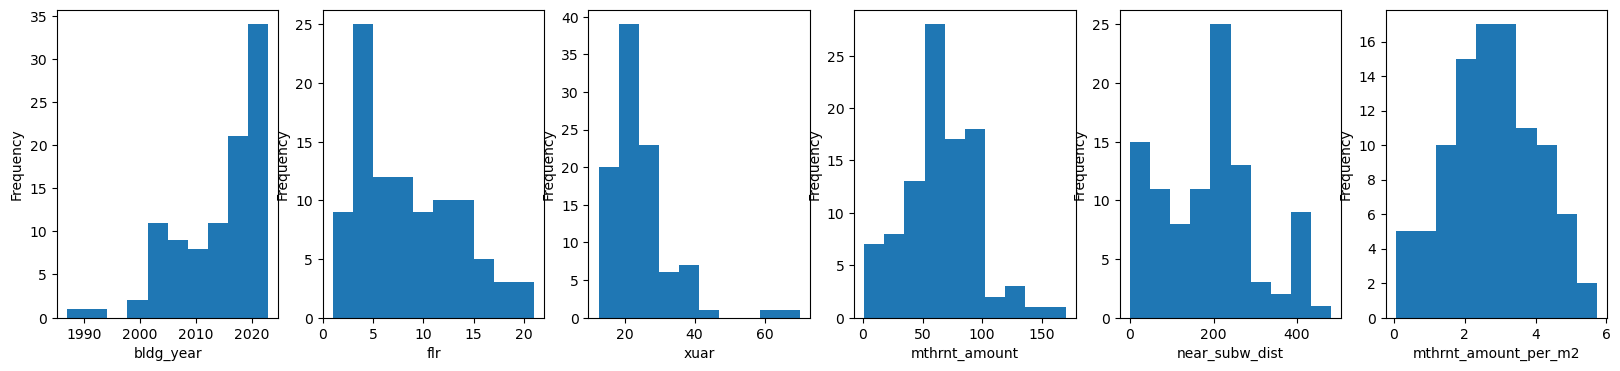

In [126]:
selected_col = ['bldg_year', 'flr', 'xuar', 'mthrnt_amount', 'near_subw_dist', 'mthrnt_amount_per_m2']
fig, axes = plt.subplots(nrows=1, ncols=len(selected_col), figsize=(20, 4))

for i in range(len(selected_col)):
    axes[i].set_xlabel(selected_col[i])
    rent_without_apt[selected_col[i]].plot.hist(ax=axes[i])

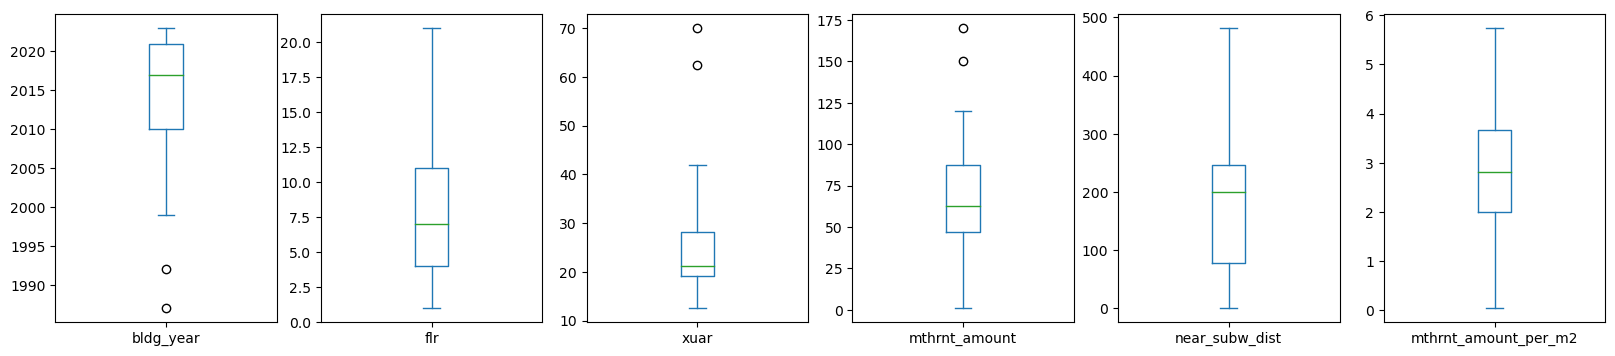

In [127]:
fig, axes = plt.subplots(nrows=1, ncols=len(selected_col), figsize=(20, 4))

for i in range(len(selected_col)):
    rent_without_apt[selected_col[i]].plot.box(ax=axes[i])

# 3. Correlation

거래 유형: 매매

<Axes: >

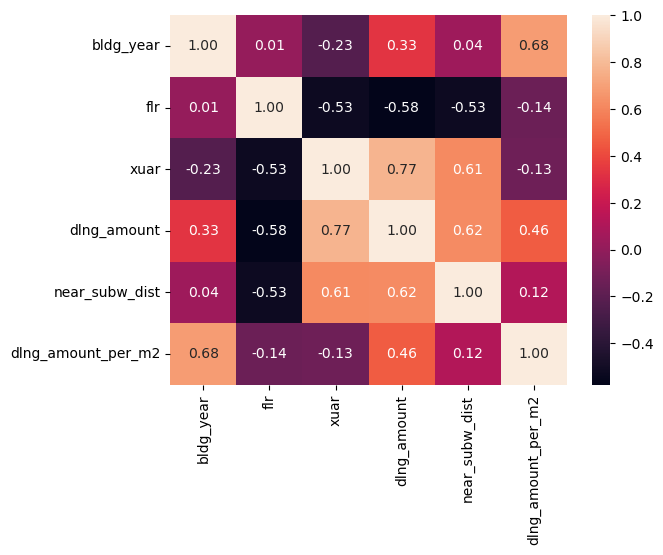

In [164]:
selected_col = ['bldg_year', 'flr', 'xuar', 'dlng_amount', 'near_subw_dist', 'dlng_amount_per_m2']
sns.heatmap(trade_without_apt[selected_col].corr(), annot=True, fmt='.2f')

거래 유형: 전세

<Axes: >

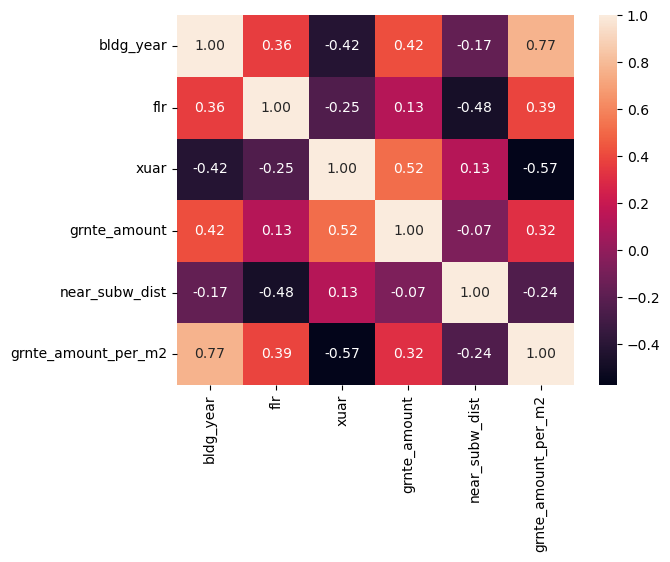

In [165]:
selected_col = ['bldg_year', 'flr', 'xuar', 'grnte_amount', 'near_subw_dist', 'grnte_amount_per_m2']
sns.heatmap(lease_without_apt[selected_col].corr(), annot=True, fmt='.2f')

거래 유형: 월세

<Axes: >

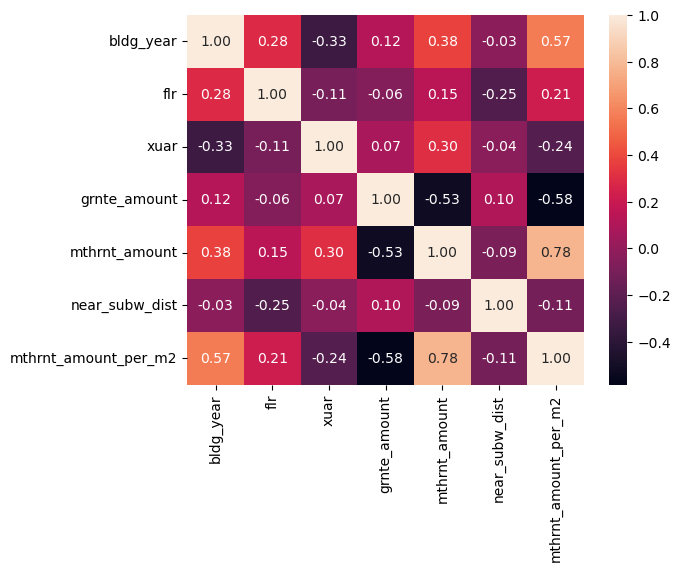

In [166]:
selected_col = ['bldg_year', 'flr', 'xuar', 'grnte_amount', 'mthrnt_amount', 'near_subw_dist', 'mthrnt_amount_per_m2']
sns.heatmap(rent_without_apt[selected_col].corr(), annot=True, fmt='.2f')

거래 유형: 매매

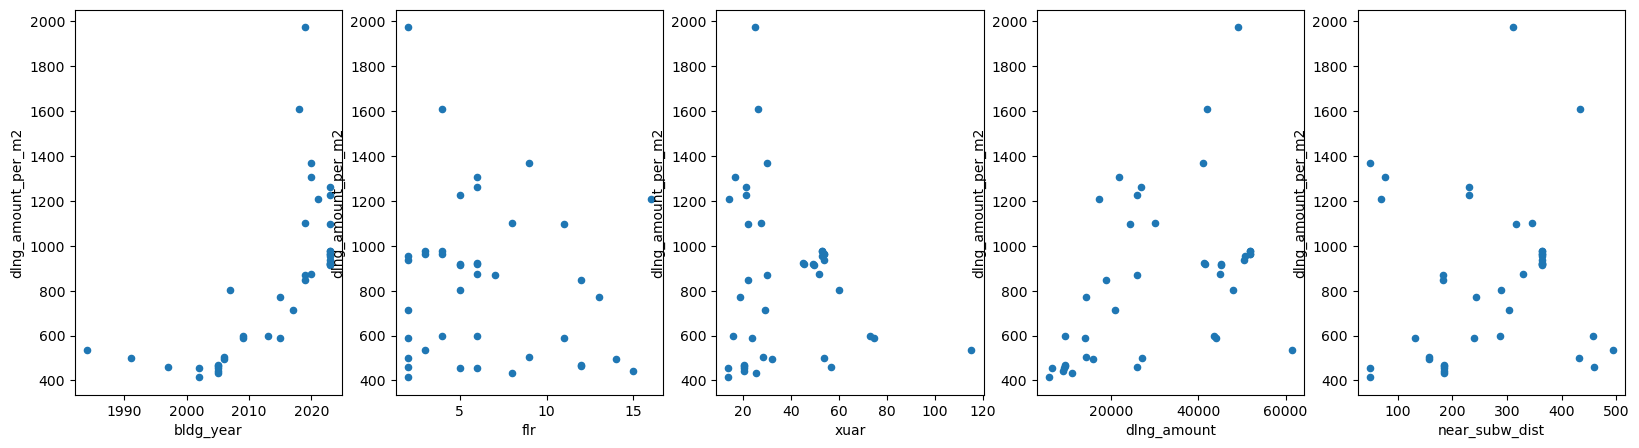

In [131]:
# 전용 면적당 매매가와 다른 변수들의 관계
selected_col = ['bldg_year', 'flr', 'xuar', 'dlng_amount', 'near_subw_dist']
fig, axes = plt.subplots(nrows=1, ncols=len(selected_col), figsize=(20, 5))
for i in range(len(selected_col)):
    trade_without_apt.plot.scatter(x=selected_col[i], y='dlng_amount_per_m2', ax=axes[i])

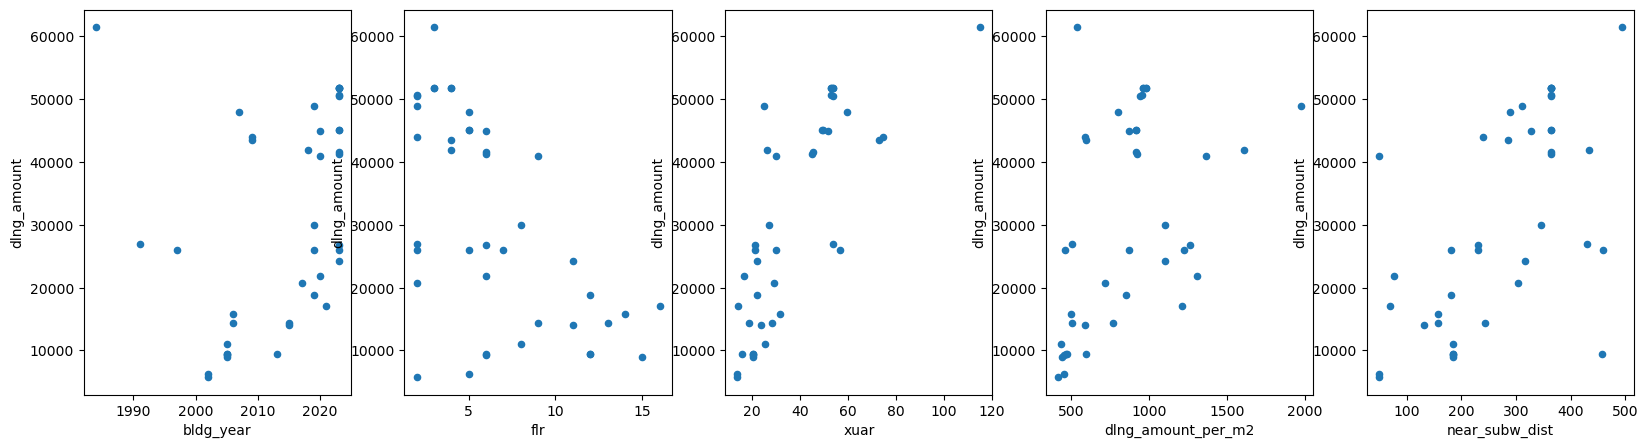

In [132]:
# 매매가와 다른 변수들의 관계
selected_col = ['bldg_year', 'flr', 'xuar', 'dlng_amount_per_m2', 'near_subw_dist']
fig, axes = plt.subplots(nrows=1, ncols=len(selected_col), figsize=(20, 5))
for i in range(len(selected_col)):
    trade_without_apt.plot.scatter(x=selected_col[i], y='dlng_amount', ax=axes[i])

거래 유형: 전세

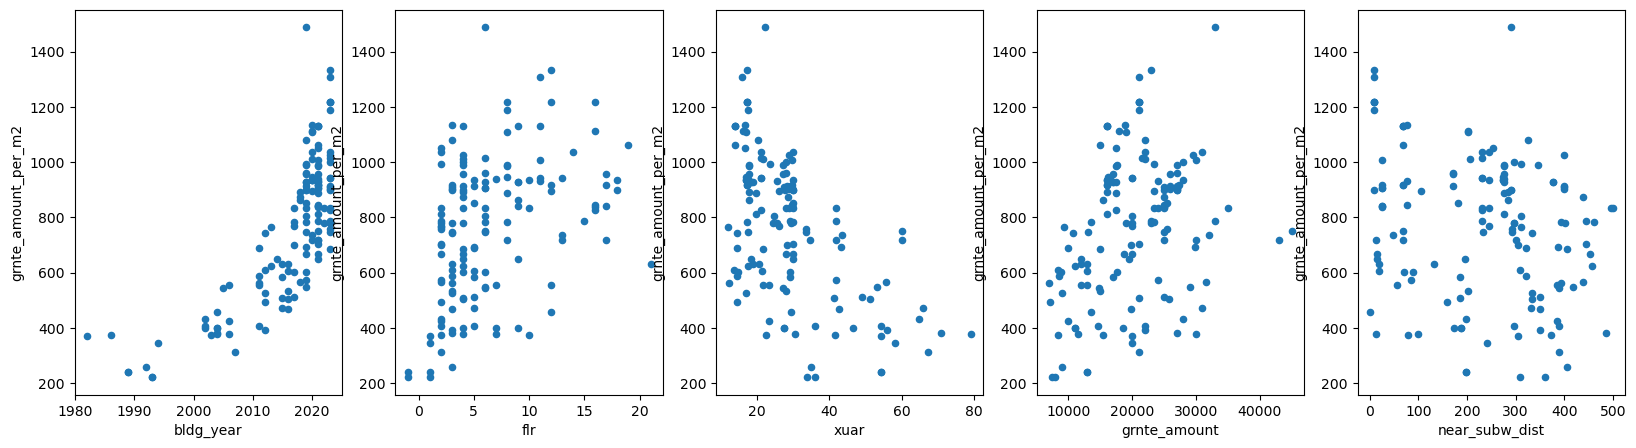

In [133]:
# 전용 면적당 전세가와 다른 변수들의 관계
selected_col = ['bldg_year', 'flr', 'xuar', 'grnte_amount', 'near_subw_dist']
fig, axes = plt.subplots(nrows=1, ncols=len(selected_col), figsize=(20, 5))
for i in range(len(selected_col)):
    lease_without_apt.plot.scatter(x=selected_col[i], y='grnte_amount_per_m2', ax=axes[i])

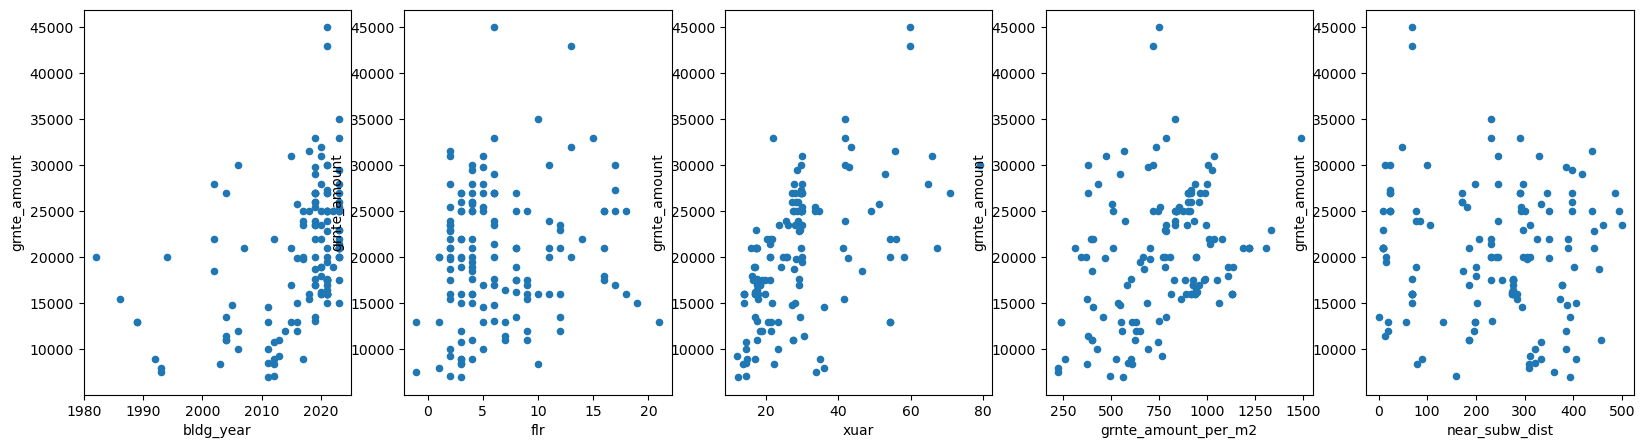

In [134]:
# 전세가와 다른 변수들의 관계
selected_col = ['bldg_year', 'flr', 'xuar', 'grnte_amount_per_m2', 'near_subw_dist']
fig, axes = plt.subplots(nrows=1, ncols=len(selected_col), figsize=(20, 5))
for i in range(len(selected_col)):
    lease_without_apt.plot.scatter(x=selected_col[i], y='grnte_amount', ax=axes[i])

거래 유형: 월세

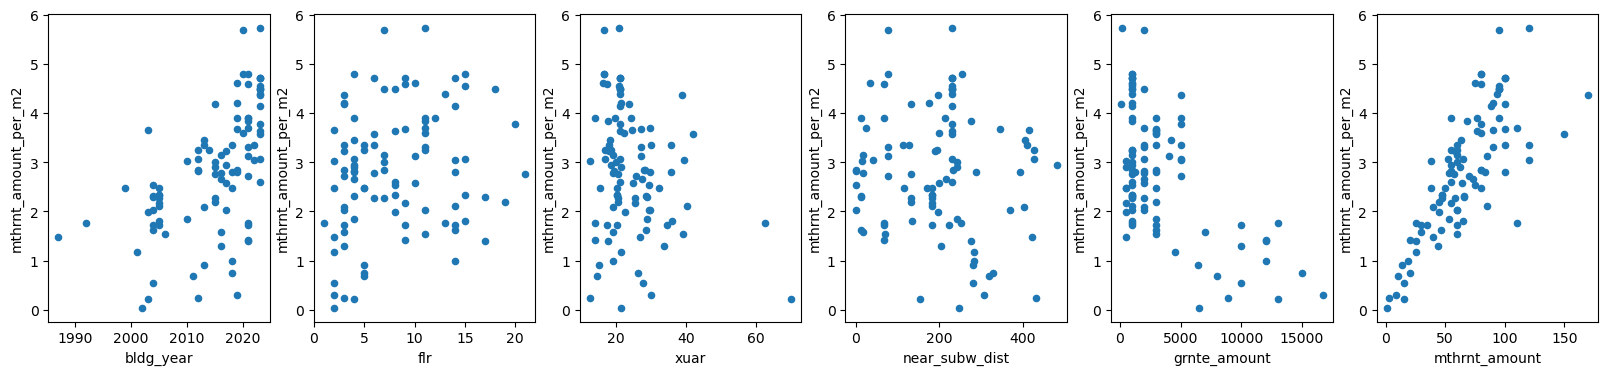

In [135]:
# 전용 면적당 월세가와 다른 변수들의 관계
selected_col = ['bldg_year', 'flr', 'xuar', 'near_subw_dist', 'grnte_amount', 'mthrnt_amount']
fig, axes = plt.subplots(nrows=1, ncols=len(selected_col), figsize=(20, 4))
for i in range(len(selected_col)):
    rent_without_apt.plot.scatter(x=selected_col[i], y='mthrnt_amount_per_m2', ax=axes[i])

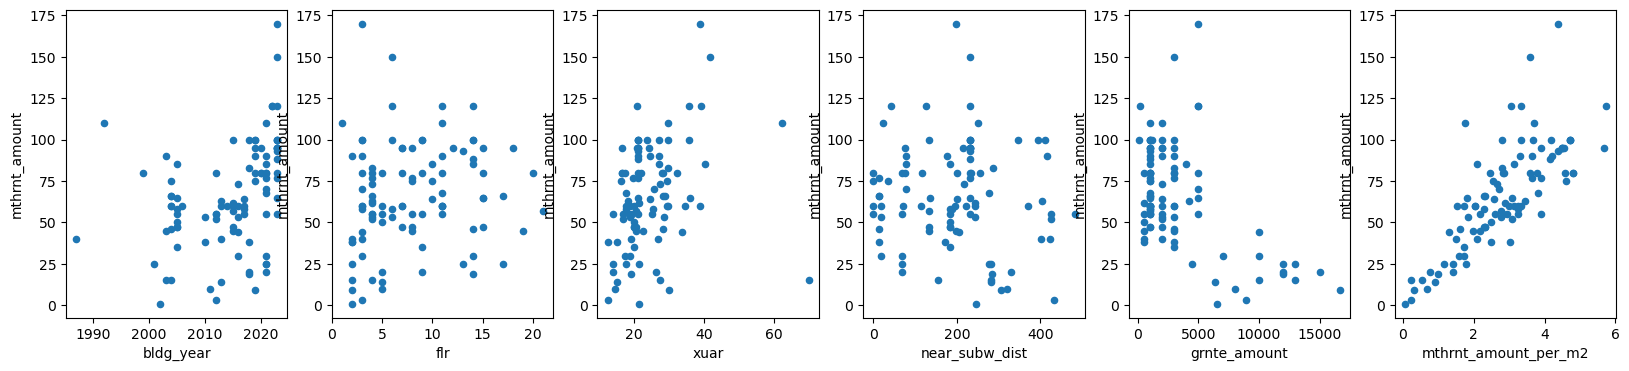

In [136]:
# 월세가와 다른 변수들의 관계
selected_col = ['bldg_year', 'flr', 'xuar', 'near_subw_dist', 'grnte_amount', 'mthrnt_amount_per_m2']
fig, axes = plt.subplots(nrows=1, ncols=len(selected_col), figsize=(20, 4))
for i in range(len(selected_col)):
    rent_without_apt.plot.scatter(x=selected_col[i], y='mthrnt_amount', ax=axes[i])

# 4. Linear Regression

Single Linear Regression

매매: 매매가 ~ 전용 면적

In [137]:
from sklearn.linear_model import LinearRegression

linear_model_trade = LinearRegression()
x = trade_without_apt['bldg_year'].values.reshape(-1, 1)
y = trade_without_apt['dlng_amount_per_m2'].values.reshape(-1, 1)

linear_model_trade.fit(x, y)

LinearRegression()

coef: [[24.21015714]], intercept: [-47917.00715251]


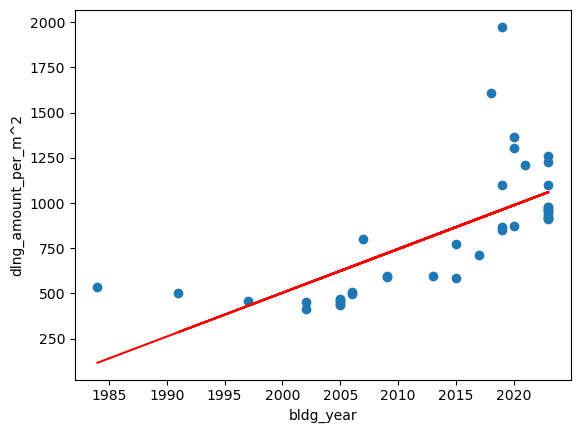

In [138]:
plt.xlabel('bldg_year')
plt.ylabel('dlng_amount_per_m^2')
plt.scatter(x, y)
plt.plot(x, linear_model_trade.predict(x), color='red')
print(f"coef: {linear_model_trade.coef_}, intercept: {linear_model_trade.intercept_}")

In [139]:
from statsmodels.formula.api import ols

model = ols("dlng_amount_per_m2 ~ bldg_year", data=trade_without_apt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     dlng_amount_per_m2   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     33.79
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           9.43e-07
Time:                        21:32:06   Log-Likelihood:                -285.55
No. Observations:                  41   AIC:                             575.1
Df Residuals:                      39   BIC:                             578.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.792e+04   8388.473     -5.712      0.000   -6.49e+04   -3.09e+04
bldg_year     24.2102      4.165      5.813      0.000      15.785      32.635
==============================================================================
Omnibus:                       31.279   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.462
Skew:                           2.078   Prob(JB):                     6.10e-15
Kurtosis:                       7.588   Cond. No.                     4.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

전세: 전세 보증금 ~ 전용 면적

In [140]:
linear_model_lease = LinearRegression()
x = lease_without_apt['bldg_year'].values.reshape(-1, 1)
y = lease_without_apt['grnte_amount_per_m2'].values.reshape(-1, 1)

linear_model_lease.fit(x, y)

LinearRegression()

coef: [[23.26837929]], intercept: [-46147.83108728]


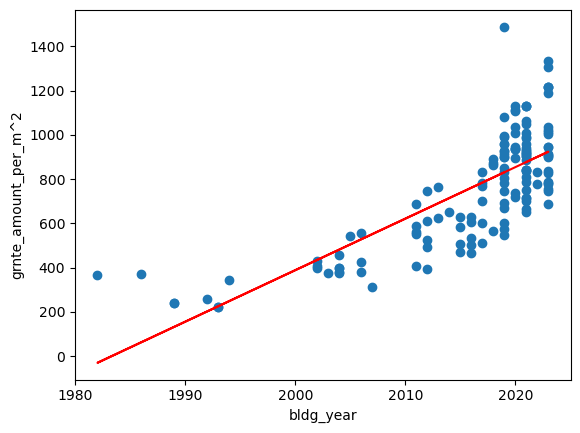

In [141]:
plt.xlabel('bldg_year')
plt.ylabel('grnte_amount_per_m^2')
plt.scatter(x, y)
plt.plot(x, linear_model_lease.predict(x), color='red')
print(f"coef: {linear_model_lease.coef_}, intercept: {linear_model_lease.intercept_}")

In [142]:
model = ols("grnte_amount_per_m2 ~ bldg_year", data=lease_without_apt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     grnte_amount_per_m2   R-squared:                       0.588
Model:                             OLS   Adj. R-squared:                  0.585
Method:                  Least Squares   F-statistic:                     201.5
Date:                 Sat, 16 Dec 2023   Prob (F-statistic):           5.78e-29
Time:                         21:32:06   Log-Likelihood:                -932.79
No. Observations:                  143   AIC:                             1870.
Df Residuals:                      141   BIC:                             1875.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.615e+04   3304.518    -13.965      0.000   -5.27e+04   -3.96e+04
bldg_year     23.2684      1.639     14.197      0.000      20.028      26.509
==============================================================================
Omnibus:                       14.052   Durbin-Watson:                   1.394
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.919
Skew:                           0.667   Prob(JB):                     0.000349
Kurtosis:                       3.946   Cond. No.                     4.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

월세: 월세 ~ 전용 면적

In [143]:
linear_model_rent = LinearRegression()
x = rent_without_apt['bldg_year'].values.reshape(-1, 1)
y = rent_without_apt['mthrnt_amount_per_m2'].values.reshape(-1, 1)

linear_model_rent.fit(x, y)

LinearRegression()

coef: [[0.09015274]], intercept: [-178.80465679]


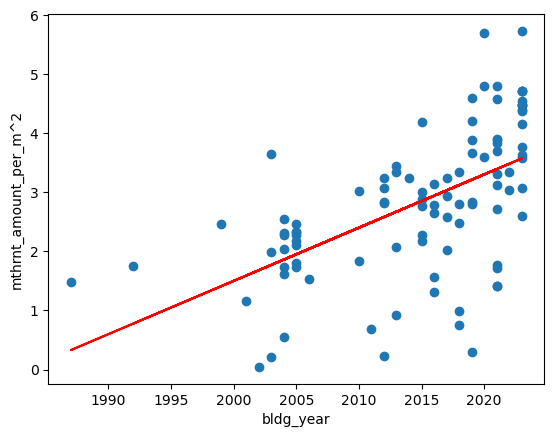

In [144]:
plt.xlabel('bldg_year')
plt.ylabel('mthrnt_amount_per_m^2')
plt.scatter(x, y)
plt.plot(x, linear_model_rent.predict(x), color='red')
print(f"coef: {linear_model_rent.coef_}, intercept: {linear_model_rent.intercept_}")

전용면적당 월세 ~ 월세

In [145]:
linear_model_rent = LinearRegression()
x = rent_without_apt['mthrnt_amount'].values.reshape(-1, 1)
y = rent_without_apt['mthrnt_amount_per_m2'].values.reshape(-1, 1)

linear_model_rent.fit(x, y)

LinearRegression()

coef: [[0.03115278]], intercept: [0.7650987]


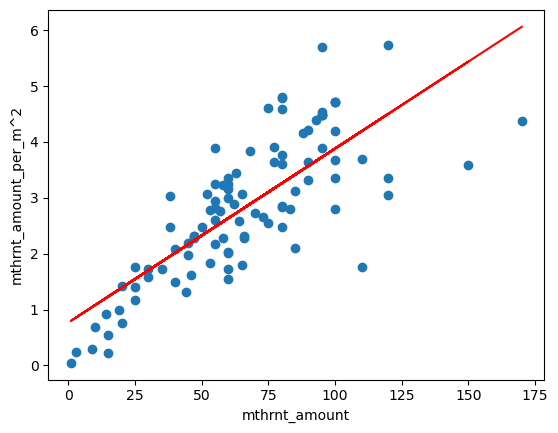

In [146]:
plt.xlabel('mthrnt_amount')
plt.ylabel('mthrnt_amount_per_m^2')
plt.scatter(x, y)
plt.plot(x, linear_model_rent.predict(x), color='red')
print(f"coef: {linear_model_rent.coef_}, intercept: {linear_model_rent.intercept_}")

In [147]:
model = ols("mthrnt_amount_per_m2 ~ mthrnt_amount", data=rent_without_apt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     mthrnt_amount_per_m2   R-squared:                       0.602
Model:                              OLS   Adj. R-squared:                  0.598
Method:                   Least Squares   F-statistic:                     145.4
Date:                  Sat, 16 Dec 2023   Prob (F-statistic):           6.25e-21
Time:                          21:32:06   Log-Likelihood:                -115.70
No. Observations:                    98   AIC:                             235.4
Df Residuals:                        96   BIC:                             240.6
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7651      0.188      4.070      0.000       0.392       1.138
mthrnt_amount     0.0312      0.003     12.057      0.000       0.026       0.036
==============================================================================
Omnibus:                        1.038   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.595   Jarque-Bera (JB):                0.604
Skew:                          -0.159   Prob(JB):                        0.739
Kurtosis:                       3.215   Cond. No.                         170.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Multiple Linear Regression

거래 유형: 매매

In [148]:
model = ols("dlng_amount_per_m2 ~ bldg_year + xuar + near_subw_dist + flr", data=trade_without_apt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     dlng_amount_per_m2   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     8.764
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           4.78e-05
Time:                        21:32:06   Log-Likelihood:                -284.40
No. Observations:                  41   AIC:                             578.8
Df Residuals:                      36   BIC:                             587.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -4.58e+04   8998.137     -5.090      0.000    -6.4e+04   -2.76e+04
bldg_year         23.2147      4.460      5.205      0.000      14.169      32.261
xuar              -1.9541      2.776     -0.704      0.486      -7.583       3.675
near_subw_dist     0.2129      0.465      0.458      0.650      -0.731       1.156
flr              -15.0620     12.926     -1.165      0.252     -41.277      11.153
==============================================================================
Omnibus:                       24.020   Durbin-Watson:                   1.207
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.032
Skew:                           1.755   Prob(JB):                     9.09e-09
Kurtosis:                       6.058   Cond. No.                     4.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

거래 유형: 전세

In [149]:
model = ols("grnte_amount_per_m2 ~ bldg_year + xuar + near_subw_dist + flr", data=lease_without_apt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     grnte_amount_per_m2   R-squared:                       0.678
Model:                             OLS   Adj. R-squared:                  0.669
Method:                  Least Squares   F-statistic:                     72.78
Date:                 Sat, 16 Dec 2023   Prob (F-statistic):           4.82e-33
Time:                         21:32:06   Log-Likelihood:                -915.14
No. Observations:                  143   AIC:                             1840.
Df Residuals:                      138   BIC:                             1855.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.637e+04   3404.016    -10.685      0.000   -4.31e+04   -2.96e+04
bldg_year         18.5043      1.686     10.977      0.000      15.171      21.838
xuar              -5.5667      1.006     -5.532      0.000      -7.556      -3.577
near_subw_dist    -0.1337      0.101     -1.322      0.188      -0.334       0.066
flr                3.2486      3.158      1.029      0.305      -2.996       9.493
==============================================================================
Omnibus:                       19.569   Durbin-Watson:                   1.391
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.411
Skew:                           0.731   Prob(JB):                     6.77e-07
Kurtosis:                       4.621   Cond. No.                     5.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

거래 유형: 월세

In [150]:
model = ols("mthrnt_amount_per_m2 ~ bldg_year + xuar + near_subw_dist + flr", data=rent_without_apt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     mthrnt_amount_per_m2   R-squared:                       0.334
Model:                              OLS   Adj. R-squared:                  0.305
Method:                   Least Squares   F-statistic:                     11.66
Date:                  Sat, 16 Dec 2023   Prob (F-statistic):           1.02e-07
Time:                          21:32:06   Log-Likelihood:                -140.97
No. Observations:                    98   AIC:                             291.9
Df Residuals:                        93   BIC:                             304.9
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -168.3584     29.887     -5.633      0.000    -227.708    -109.009
bldg_year          0.0851      0.015      5.746      0.000       0.056       0.115
xuar              -0.0081      0.013     -0.648      0.519      -0.033       0.017
near_subw_dist    -0.0009      0.001     -0.994      0.323      -0.003       0.001
flr                0.0090      0.023      0.384      0.702      -0.037       0.055
==============================================================================
Omnibus:                        4.000   Durbin-Watson:                   1.665
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                3.640
Skew:                          -0.471   Prob(JB):                        0.162
Kurtosis:                       3.062   Cond. No.                     5.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 5. Spline Regression

매매: 평당 매매가 ~ 인근역까지의 거리

In [151]:
from statsmodels.formula.api import ols
formula_trade = 'dlng_amount_per_m2 ~ bs(near_subw_dist, df=5, degree=1)'
spline_model_trade = ols(formula_trade, data=trade_without_apt).fit()
print(spline_model_trade.summary())

                            OLS Regression Results                            
Dep. Variable:     dlng_amount_per_m2   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     2.376
Date:                Sat, 16 Dec 2023   Prob (F-statistic):             0.0588
Time:                        21:32:06   Log-Likelihood:                -292.35
No. Observations:                  41   AIC:                             596.7
Df Residuals:                      35   BIC:                             607.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

min or max point: [179.07777778 322.72222222]


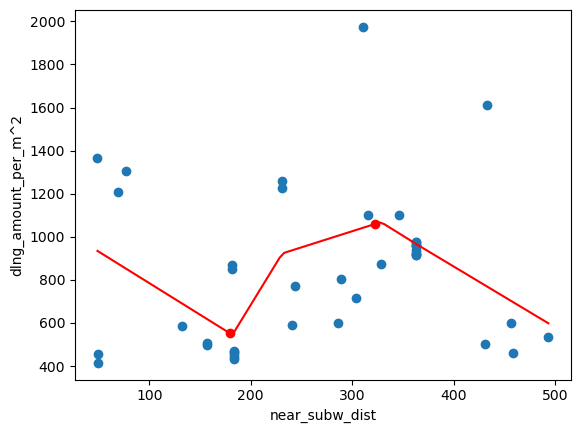

In [152]:
# plot the data, MinMax point and fitted model
import numpy as np

near_subw_dist_trade = np.array(trade_without_apt['near_subw_dist'].values)
dlng_amount = np.array(trade_without_apt['dlng_amount_per_m2'].values)

x_trade = np.linspace(near_subw_dist_trade.min(), near_subw_dist_trade.max(), 100)
derivative = np.gradient(spline_model_trade.predict({'near_subw_dist': x_trade}), x_trade)
zero_derivative_point = np.where(np.diff(np.sign(derivative)))[0]

plt.xlabel('near_subw_dist')
plt.ylabel('dlng_amount_per_m^2')
plt.scatter(near_subw_dist_trade, dlng_amount)
plt.scatter(x_trade[zero_derivative_point], spline_model_trade.predict({'near_subw_dist': x_trade[zero_derivative_point]}), color='red')
plt.plot(x_trade, spline_model_trade.predict({'near_subw_dist': x_trade}), color='red')
print(f"min or max point: {x_trade[zero_derivative_point]}")

In [153]:
#cubic spline
from pygam import LinearGAM, s

gam_trade = LinearGAM(s(0, n_splines=10))
gam_trade.fit(near_subw_dist_trade, dlng_amount)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + intercept, tol=0.0001, 
   verbose=False)

min or max point: [161.12222222 331.7       ]


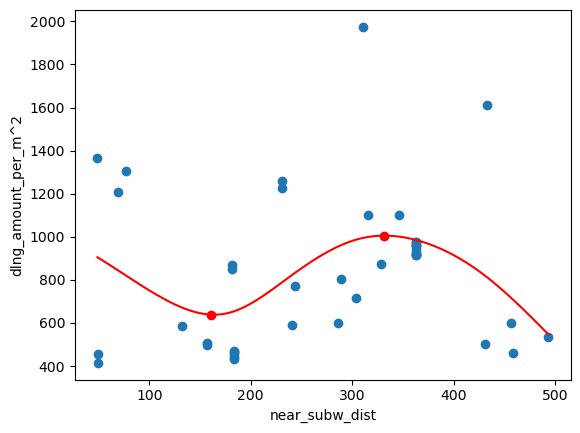

In [154]:
# plot the data, MinMax point and fitted model
derivative = np.gradient(gam_trade.predict(x_trade), x_trade)
zero_derivative_point = np.where(np.diff(np.sign(derivative)))[0] # 최대값, 최소값 지점

plt.xlabel('near_subw_dist')
plt.ylabel('dlng_amount_per_m^2')
plt.plot(x_trade, gam_trade.predict(x_trade), color='red')
plt.scatter(x_trade[zero_derivative_point], gam_trade.predict(x_trade[zero_derivative_point]), color='red')
plt.scatter(near_subw_dist_trade, dlng_amount)
print(f"min or max point: {x_trade[zero_derivative_point]}")

전세: 단위면적당 전세 보증금 ~ 인근역까지의 거리

In [155]:
# linear spline
formula_lease = 'grnte_amount_per_m2 ~ bs(near_subw_dist, df=5, degree=1)'
spline_model_lease = ols(formula_lease, data=lease_without_apt).fit()
print(spline_model_lease.summary())

                             OLS Regression Results                            
Dep. Variable:     grnte_amount_per_m2   R-squared:                       0.145
Model:                             OLS   Adj. R-squared:                  0.114
Method:                  Least Squares   F-statistic:                     4.661
Date:                 Sat, 16 Dec 2023   Prob (F-statistic):           0.000583
Time:                         21:32:06   Log-Likelihood:                -985.02
No. Observations:                  143   AIC:                             1982.
Df Residuals:                      137   BIC:                             2000.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

min or max point: [196.65454545 287.41818182 368.0969697 ]


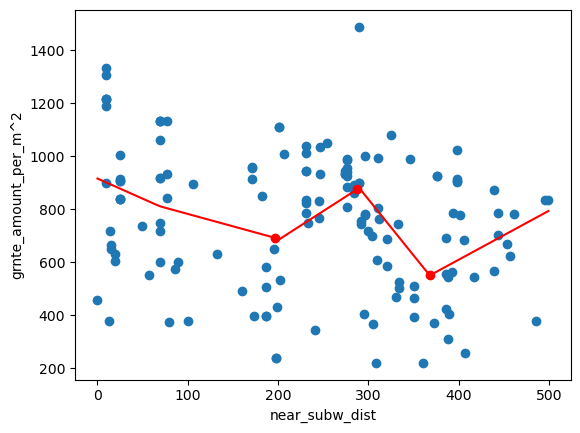

In [156]:
# plot the data, MinMax point and fitted model
near_subw_dist_lease = np.array(lease_without_apt['near_subw_dist'].values)
grnte_amount = np.array(lease_without_apt['grnte_amount_per_m2'].values)

x_lease = np.linspace(near_subw_dist_lease.min(), near_subw_dist_lease.max(), 100)
derivatve = np.gradient(spline_model_lease.predict({'near_subw_dist': x_lease}), x_lease)
zero_derivative_point = np.where(np.diff(np.sign(derivatve)))[0] # 최대값, 최소값 지점

plt.xlabel('near_subw_dist')
plt.ylabel('grnte_amount_per_m^2')
plt.scatter(near_subw_dist_lease, grnte_amount)
plt.scatter(x_lease[zero_derivative_point], spline_model_lease.predict({'near_subw_dist': x_lease[zero_derivative_point]}), color='red')
plt.plot(x_lease, spline_model_lease.predict({'near_subw_dist': x_lease}), color='red')
print(f"min or max point: {x_lease[zero_derivative_point]}")

In [157]:
# cubic spline
gam_lease = LinearGAM(s(0, n_splines=10))
gam_lease.fit(near_subw_dist_lease, grnte_amount)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + intercept, tol=0.0001, 
   verbose=False)

min or max point: [141.18787879 262.20606061 383.22424242]


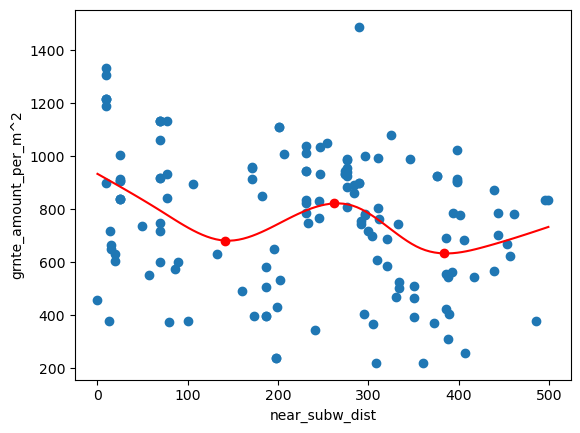

In [158]:
# plot the data, MinMax point and fitted model
derivative = np.gradient(gam_lease.predict(x_lease), x_lease)
zero_derivative_point = np.where(np.diff(np.sign(derivative)))[0]

plt.xlabel('near_subw_dist')
plt.ylabel('grnte_amount_per_m^2')
plt.plot(x_lease, gam_lease.predict(x_lease), color='red')
plt.scatter(x_lease[zero_derivative_point], gam_lease.predict(x_lease[zero_derivative_point]), color='red')
plt.scatter(near_subw_dist_lease, grnte_amount)
print(f"min or max point: {x_lease[zero_derivative_point]}")

월세: 평당 월세 ~ 인근역까지의 거리

In [159]:
# linear spline
formula_rent = 'mthrnt_amount_per_m2 ~ bs(near_subw_dist, df=5, degree=1)'
spline_model_rent = ols(formula_rent, data=rent_without_apt).fit()
print(spline_model_rent.summary())

                             OLS Regression Results                             
Dep. Variable:     mthrnt_amount_per_m2   R-squared:                       0.282
Model:                              OLS   Adj. R-squared:                  0.243
Method:                   Least Squares   F-statistic:                     7.238
Date:                  Sat, 16 Dec 2023   Prob (F-statistic):           9.37e-06
Time:                          21:32:07   Log-Likelihood:                -144.63
No. Observations:                    98   AIC:                             301.3
Df Residuals:                        92   BIC:                             316.8
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

min or max point: [ 68.11919192 180.02929293 228.68585859 282.20808081]


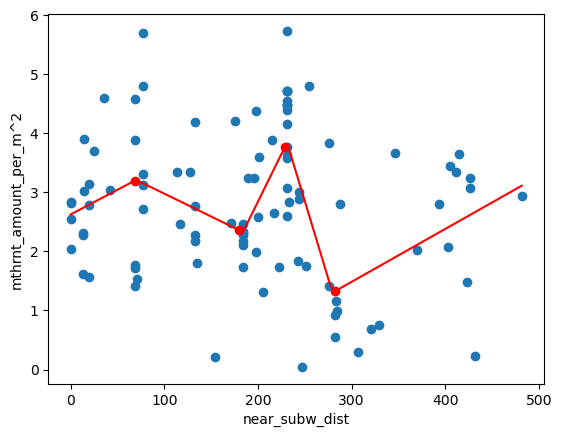

In [160]:
# plot the data, MinMax point and fitted model
near_subw_dist_rent = np.array(rent_without_apt['near_subw_dist'].values)
mthrnt_amount = np.array(rent_without_apt['mthrnt_amount_per_m2'].values)

x_rent = np.linspace(near_subw_dist_rent.min(), near_subw_dist_rent.max(), 100)
derivatve = np.gradient(spline_model_rent.predict({'near_subw_dist': x_rent}), x_rent)
zero_derivative_point = np.where(np.diff(np.sign(derivatve)))[0] # 최대값, 최소값 지점

plt.xlabel('near_subw_dist')
plt.ylabel('mthrnt_amount_per_m^2')
plt.scatter(near_subw_dist_rent, mthrnt_amount)
plt.scatter(x_rent[zero_derivative_point], spline_model_rent.predict({'near_subw_dist': x_rent[zero_derivative_point]}), color='red')
plt.plot(x_rent, spline_model_rent.predict({'near_subw_dist': x_rent}), color='red')
print(f"min or max point: {x_rent[zero_derivative_point]}")

In [161]:
# cubic spline
gam_rent = LinearGAM(s(0, n_splines=10))
gam_rent.fit(near_subw_dist_rent, mthrnt_amount)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + intercept, tol=0.0001, 
   verbose=False)

mix or max point: [126.50707071 199.49191919 340.5959596 ]


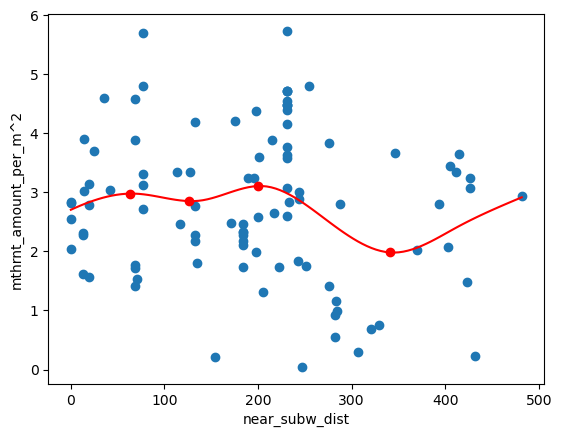

In [162]:
# plot the data, MinMax point and fitted model
derivatve = np.gradient(gam_rent.predict(x_rent), x_rent)
zero_derivative_point = np.where(np.diff(np.sign(derivatve)))[0] # 변곡점

plt.xlabel('near_subw_dist')
plt.ylabel('mthrnt_amount_per_m^2')
plt.scatter(near_subw_dist_rent, mthrnt_amount)
plt.scatter(x_rent[zero_derivative_point], gam_rent.predict(x_rent[zero_derivative_point]), color='red')
plt.plot(x_rent, gam_rent.predict(x_rent), color='red')
print(f"mix or max point: {x_rent[zero_derivative_point][-3:]}")